In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Carrega les dades des del fitxer CSV
data = pd.read_csv('data/DS-2023-000/proxy-sql-dataset.csv', delimiter=";")

# Convertim les etiquetes de text a números (0 o 1)
label_encoder = LabelEncoder()
data['malignant'] = label_encoder.fit_transform(data['malignant'])

# Separem les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(data['query'], data['malignant'], test_size=0.2, random_state=42)

# Tokenització i padding del text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post', truncating='post')

# Construeix el model amb una capa GRU
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    GRU(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenament del model
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Avaluació del model
loss, accuracy = model.evaluate(X_test_padded, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')


Epoch 1/5
1000/1000 [==============================] - 7s 6ms/step - loss: 0.3034 - accuracy: 0.8559 - val_loss: 0.1173 - val_accuracy: 0.9729
Epoch 2/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.2716 - accuracy: 0.8805 - val_loss: 0.0627 - val_accuracy: 0.9821
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0446 - accuracy: 0.9907 - val_loss: 0.0456 - val_accuracy: 0.9910
Epoch 4/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0311 - accuracy: 0.9941 - val_loss: 0.0386 - val_accuracy: 0.9921
Epoch 5/5
250/250 [==============================] - 0s 2ms/step - loss: 0.0373 - accuracy: 0.9923
Loss: 0.03727917745709419, Accuracy: 0.9922500252723694


Epoch 1/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.3312 - accuracy: 0.8294 - val_loss: 0.1091 - val_accuracy: 0.9741
Epoch 2/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.0851 - accuracy: 0.9811 - val_loss: 0.0978 - val_accuracy: 0.9770
Epoch 3/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1075 - accuracy: 0.9703 - val_loss: 0.1532 - val_accuracy: 0.9676
Epoch 4/5
1000/1000 [==============================] - 6s 6ms/step - loss: 0.1392 - accuracy: 0.9423 - val_loss: 0.0452 - val_accuracy: 0.9919
Epoch 5/5
250/250 [==============================] - 1s 2ms/step


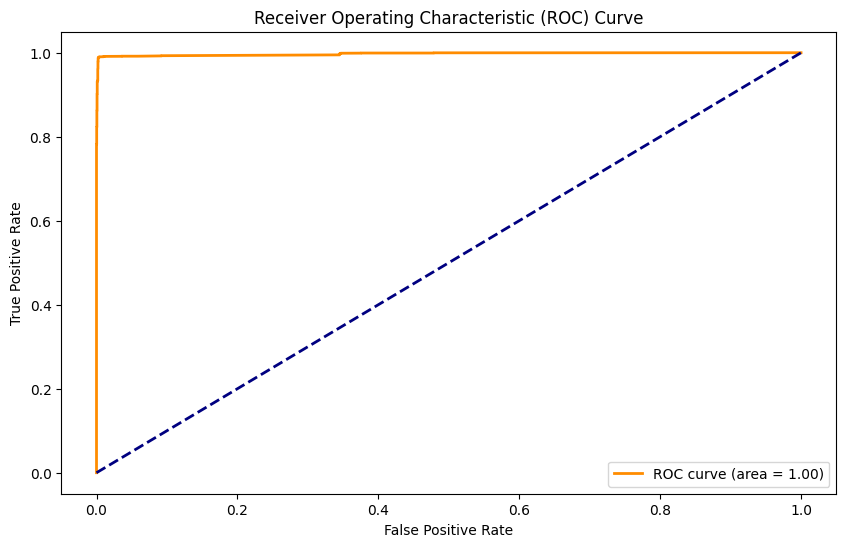

Accuracy: 0.9926
Confusion Matrix:
[[3885    9]
 [  50 4056]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3894
           1       1.00      0.99      0.99      4106

    accuracy                           0.99      8000
   macro avg       0.99      0.99      0.99      8000
weighted avg       0.99      0.99      0.99      8000



In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense

# Carrega les dades des del fitxer CSV
data = pd.read_csv('data/DS-2023-000/proxy-sql-dataset.csv', delimiter=";")

# Convertim les etiquetes de text a números (0 o 1)
label_encoder = LabelEncoder()
data['malignant'] = label_encoder.fit_transform(data['malignant'])

# Separem les dades en conjunts d'entrenament i prova
X_train, X_test, y_train, y_test = train_test_split(data['query'], data['malignant'], test_size=0.2, random_state=42)

# Tokenització i padding del text
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train_padded = pad_sequences(X_train_sequences, maxlen=50, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=50, padding='post', truncating='post')

# Construeix el model amb una capa GRU
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=50),
    GRU(64),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenament del model
model.fit(X_train_padded, y_train, epochs=5, validation_data=(X_test_padded, y_test))

# Prediccions del model
y_pred = model.predict(X_test_padded)
y_pred_binary = (y_pred > 0.5).astype(int)

# Càlcul de mètriques
accuracy = accuracy_score(y_test, y_pred_binary)
conf_matrix = confusion_matrix(y_test, y_pred_binary)
classification_rep = classification_report(y_test, y_pred_binary)

# Calcula la corba ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Visualitza la corba ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Mostra les mètriques
print(f'Accuracy: {accuracy:.4f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')
